In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath as mp

import scipy.special as ss

In [3]:
from mpmath import ellipf, ellipe
from csr2d.core import psi_s, psi_x, alpha

In [6]:
@np.vectorize
def my_ellipf(phi,m):
    y = mp.ellipf(phi,m)
    y = np.float(y)
    return y

@np.vectorize
def my_ellipe(phi,m):
    y = mp.ellipe(phi,m)
    y = np.float(y)
    return y

@np.vectorize
def arg2(x):
    return -4*(1+x)/x**2

In [19]:
@np.vectorize
def ss_ellipf(phi,m):
    y = ss.ellipkinc(phi,m)
    #y = np.float(y)
    return y

@np.vectorize
def ss_ellipe(phi,m):
    y = ss.ellipeinc(phi,m)
    #y = np.float(y)
    return y

In [15]:
my_ellipf(0.01,-2)

array(0.00999967)

In [17]:
ss_ellipf(0.01,-2)

array(0.00999967)

In [270]:
# Avoid x = zero
xvec = np.append(np.arange(-0.1,-0.001,0.001),np.arange(0.001,0.1,0.001))

<function matplotlib.pyplot.show(*args, **kw)>

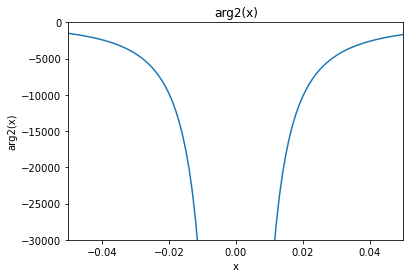

In [283]:
plt.plot(xvec, arg2(xvec) )
plt.ylim(-30000,0.1)
plt.xlim(-0.05,0.05)
plt.xlabel('x')
plt.ylabel('arg2(x)')
plt.title('arg2(x)')
plt.show

In [8]:
print(arg2(xmin))
print(arg2(xmax))

NameError: name 'xmin' is not defined

In [9]:
phi_vec = np.arange(-np.pi/2, np.pi/2,0.05)
m_vec = np.arange(-100000, arg2(-360), 1000)

phim, mm = np.meshgrid(phi_vec, m_vec, sparse=False, indexing='ij')
h1 = my_ellipf(phim, mm)
h2 = my_ellipe(phim, mm)

In [22]:
h1

array([[-0.02258733, -0.02268515, -0.02278438, ..., -0.11596746,
        -0.15302933, -1.57079633],
       [-0.02242915, -0.02252618, -0.0226246 , ..., -0.11484924,
        -0.15144833, -1.52079633],
       [-0.02227058, -0.0223668 , -0.02246441, ..., -0.11372822,
        -0.14986336, -1.47079633],
       ...,
       [ 0.02213808,  0.02223363,  0.02233057, ...,  0.11279152,
         0.14853901,  1.42920367],
       [ 0.02229729,  0.02239364,  0.02249139, ...,  0.11391703,
         0.15013032,  1.47920367],
       [ 0.02245577,  0.02255292,  0.02265148, ...,  0.11503738,
         0.15171434,  1.52920367]])

In [20]:
h3 = ss_ellipf(phim, mm)
h4 = ss_ellipe(phim, mm)

In [21]:
h3

array([[-0.02258733, -0.02268515, -0.02278438, ..., -0.11596746,
        -0.15302933, -1.57079633],
       [-0.02242915, -0.02252618, -0.0226246 , ..., -0.11484924,
        -0.15144833, -1.52079633],
       [-0.02227058, -0.0223668 , -0.02246441, ..., -0.11372822,
        -0.14986336, -1.47079633],
       ...,
       [ 0.02213808,  0.02223363,  0.02233057, ...,  0.11279152,
         0.14853901,  1.42920367],
       [ 0.02229729,  0.02239364,  0.02249139, ...,  0.11391703,
         0.15013032,  1.47920367],
       [ 0.02245577,  0.02255292,  0.02265148, ...,  0.11503738,
         0.15171434,  1.52920367]])

Text(0.5, 1.0, 'mpmath.ellipf(phi,m)')

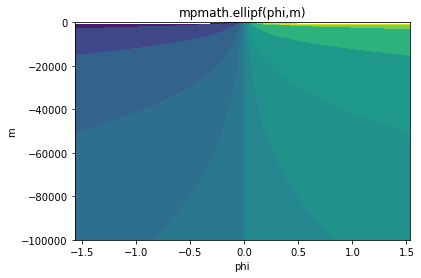

In [11]:
levels = [-0.15, -0.1, -0.05, -0.03,-0.02, 0, 0.02, 0.03, 0.05, 0.1, 0.15, 0.2]
p1 = plt.contourf(phim, mm, h1, levels=levels)
plt.xlabel('phi')
plt.ylabel('m')
#plt.legend()
plt.title('mpmath.ellipf(phi,m)')

Text(0.5, 1.0, 'mpmath.ellipe(phi,m)')

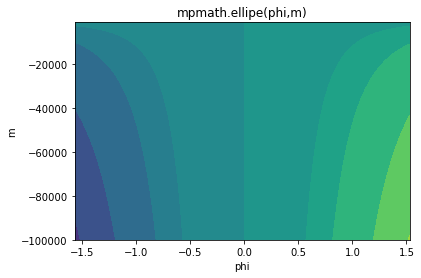

In [289]:
levels = [-500, -400, -300, -200,-100, -50, 0, 50, 100, 200, 300, 400, 500]
p1 = plt.contourf(phim, mm, h2, levels=levels)
plt.xlabel('phi')
plt.ylabel('m')
#plt.legend()
plt.title('mpmath.ellipe(phi,m)')

In [287]:
h2

array([[-316.23985026, -314.65479159, -313.06170765, ...,  -54.82601732,
         -44.7849362 ,  -31.70720405],
       [-300.43497013, -298.92913362, -297.41567296, ...,  -52.08808889,
         -42.54924062,  -30.12593325],
       [-284.66959357, -283.2427812 , -281.80874482, ...,  -49.35700157,
         -40.31913032,  -28.54861084],
       ...,
       [ 271.61356075,  270.2521919 ,  268.8839304 , ...,   47.09525936,
          38.47226941,   27.24235184],
       [ 287.31604576,  285.87596802,  284.42859909, ...,   49.81545532,
          40.6934877 ,   28.81338823],
       [ 303.09082449,  301.57167548,  300.04483491, ...,   52.54817088,
          42.92492735,   30.39165039]])

In [78]:
my_ellipf(phim, mm)

array([[-0.02258733, -0.02363353, -0.02485893, -0.02632295, -0.02811737,
        -0.03039333, -0.03342288, -0.03776289, -0.04481623, -0.0599134 ],
       [-0.01870981, -0.01954627, -0.02052373, -0.02168844, -0.02311153,
        -0.02490973, -0.02729205, -0.03068367, -0.03614611, -0.04765251],
       [ 0.01776981,  0.01855542,  0.01947278,  0.02056493,  0.02189801,
         0.02358039,  0.02580583,  0.02896756,  0.03404439,  0.04468057],
       [ 0.02213808,  0.02315998,  0.02435664,  0.02578599,  0.02753738,
         0.02975799,  0.03271255,  0.03694267,  0.04381168,  0.05849279],
       [ 0.02571382,  0.02692914,  0.02835444,  0.03005981,  0.03215362,
         0.03481481,  0.03836624,  0.04347095,  0.05180706,  0.06979959]])

In [116]:
my_ellipf(300,0)

array(300.)

In [123]:
zvec = np.arange(-2,2,0.01)

In [253]:
y1[0]-y0[0]

0.0

/global/homes/w/wlou1991/CSR2D/csr2d/core.py:83: RuntimeWarning: invalid value encountered in sqrt
  return temp + ( temp**2 - ( zeta(z,x,beta)/3 + nu(x,beta)**2/36 )**3 )**(1/2)


Text(0.5, 1.0, 'alpha(z,x) for different x')

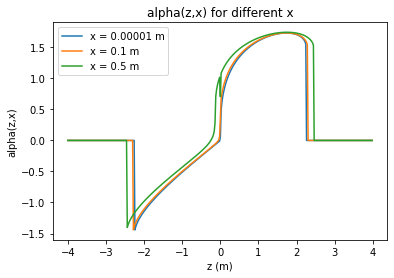

In [258]:
# Find the range of alpha(z,x), which is not +/- pi/2 ?
zvec = np.arange(-4,4,0.02)

#y0 = alpha(zvec,0.000,0.999) 
y1 = alpha(zvec,0.00001,0.999) 
y2 = alpha(zvec,0.1,0.999) 
y3 = alpha(zvec,0.5,0.999) 

plt.plot(zvec, y1)
plt.plot(zvec, y2)
plt.plot(zvec, y3)
#plt.plot(zvec, alpha(zvec,0.00,0.999) )
plt.xlabel('z (m)')
plt.ylabel('alpha(z,x)')
plt.legend(('x = 0.00001 m', 'x = 0.1 m', 'x = 0.5 m'))
plt.title('alpha(z,x) for different x')

In [282]:
# For |z| < 0.5m, amd |x/R| < 0.1m, alpha is within +/- 2  
zvec = np.arange(-0.1,0.1,0.02)
print(np.max(alpha(zvec,0.1,0.999)))
print(np.max(alpha(zvec,0.0001,0.999)))
print(np.min(alpha(zvec,0.1,0.999)))
print(np.min(alpha(zvec,0.0001,0.999)))

0.8694914130834012
0.7671364035437823
-0.036863836080643475
-0.05003418534342574


In [261]:
np.pi/2 

1.5707963267948966

In [225]:
f1 = lambda z: ellipf(z,-1)
f2 = lambda z: ellipf(z,-0.5)
f3 = lambda z: ellipf(z,0)
f4 = lambda z: ellipf(z,0.5)
f5 = lambda z: ellipf(z,1)
#plt.plot([f1,f2,f3,f4,f5], [0,3.14], [0,4])

In [175]:
plot([ellipk, ellipe], [-2,1], [0,3], points=600)

NameError: name 'plot' is not defined

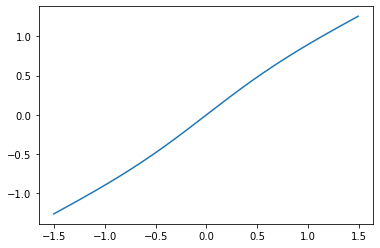

In [227]:
ang = np.arange(-1.5, 1.5, 0.01)
plt.plot(ang, my_ellipf(ang, -1))

In [224]:
f1(1000000)

mpf('834626.7895847403')

In [199]:
f1

<function __main__.<lambda>(z)>

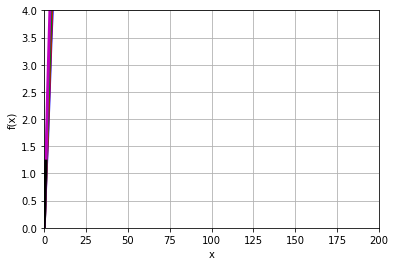

In [204]:
f1 = lambda z: mp.ellipf(z,-1)
f2 = lambda z: mp.ellipf(z,-0.5)
f3 = lambda z: mp.ellipf(z,0)
f4 = lambda z: mp.ellipf(z,0.5)
f5 = lambda z: mp.ellipf(z,1)
mp.plot([f1,f2,f3,f4,f5], [0,200], [0,4])

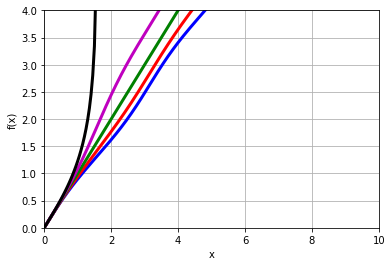

In [217]:
f1r = lambda z: mp.re(mp.ellipf(z,-1))
f2r = lambda z:  mp.re(mp.ellipf(z,-0.5))
f3r = lambda z:  mp.re(mp.ellipf(z,0))
f4r = lambda z:  mp.re(mp.ellipf(z,0.5))
f5r = lambda z:  mp.re(mp.ellipf(z,1))
mp.plot([f1r,f2r,f3r,f4r,f5r], [0,10], [0,4])

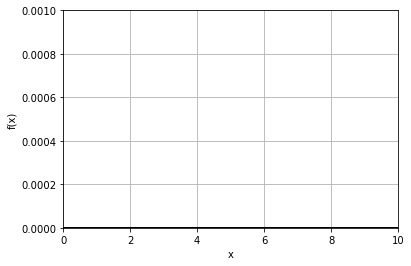

In [220]:
f1i = lambda z: mp.im(mp.ellipf(z,-1))
f2i = lambda z:  mp.im(mp.ellipf(z,-0.5))
f3i = lambda z:  mp.im(mp.ellipf(z,0))
f4i = lambda z:  mp.im(mp.ellipf(z,0.5))
f5i = lambda z:  mp.im(mp.ellipf(z,1))
mp.plot([f1i,f2i,f3i,f4i,f5i], [0,10], [0,0.001])

In [208]:
mp.plot([f1], [0,200], [0,4])

mpf('23.524236334654468')

In [213]:
mp.re(mp.ellipf(1, 2))

mpf('1.3110287771460598')

In [211]:
mp.ellipf(1, -2)

mpf('0.82956088578834131')